In SARIMAX model cases, it was noticed that $y_{t}$ can be affected by exogeneous varibales, but vice versa isn't possible
<br> However, variables can afect each other. In such cases, ***VAR*** can be used

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.
<br>
<br>
The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$
<br>
<br>

Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>


# Steps for VAR Modeling
The general steps involved in building a VAR model are:
1) Examine the data <br>
2) Visualize the data <br>
3) Test for stationarity <br>
4) If necessary, transform the data to make it stationary <br>
5) Select the appropriate order <em>p</em> <br>
6) Instantiate the model and fit it to a training set <br>
7) If necessary, invert the earlier transformation <br>
8) Evaluate model predictions against a known test set <br>
9) Forecast the future

Recall that to fit a SARIMAX model we passed one field of data as our <em>endog</em> variable, and another for <em>exog</em>. With VAR, both fields will be passed in as <em>endog</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html'>vector_ar.var_model.VAR</a></strong><font color=black>(endog[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit VAR(p) process and do lag order selection<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>vector_ar.var_model.VARResults</a></strong><font color=black>(endog, …[, …])</font>&nbsp;&nbsp;Estimate VAR(p) process with fixed number of lags<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.dynamic.DynamicVAR.html'>vector_ar.dynamic.DynamicVAR</a></strong><font color=black>(data[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Estimates time-varying vector autoregression (VAR(p)) using equation-by-equation least squares</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/vector_ar.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Vector_autoregression'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregression</font>
</div>

lets assume<br>
y1 = personal expenditure<br>
y2 = money stock<br>

In this example, k=2 as we have two time series which have relationship to one other <br>
so, a 2-dimensional VAR(1) model is:<br>

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

## Step 1) Examine the data

In [11]:
df=df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [18]:
df.isna().sum()

Money       0
Spending    0
dtype: int64

In [15]:
len(df)

252

## Step 2) Visualize the data

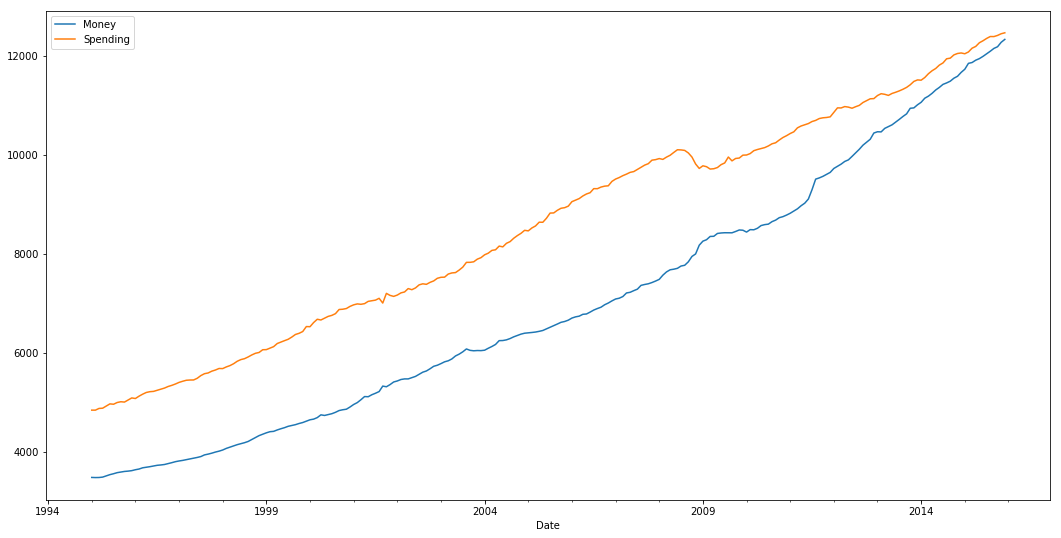

In [20]:
df.plot(figsize=(18,9));

## Step 3) Test for Stationarity

In [21]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [22]:
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [23]:
adf_test(df["Spending"],title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [56]:
df_transformed = df.copy()
df_transformed = df_transformed.diff().dropna()

In [57]:
df_transformed.head()

,Money,Spending
Date,,
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
1995-06-01,24.7,44.4


In [62]:
adf_test(df_transformed["Money"],"Money"); print("\n"); adf_test(df_transformed["Spending"],"Spending")

Augmented Dickey-Fuller Test: Money
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: Spending
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [63]:
df_transformed = df_transformed.diff().dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [64]:
adf_test(df_transformed["Money"],"Money"); print("\n"); adf_test(df_transformed["Spending"],"Spending")

Augmented Dickey-Fuller Test: Money
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: Spending
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## Train-Test Split

In [71]:
nobs = 12 #12 months observation
train = df_transformed[:-nobs]; test = df_transformed[-nobs:]
print(f"Len of DF:{len(df_transformed)}, train:{len(train)} and test:{len(test)}")

Len of DF:250, train:238 and test:12


## Step 5) Grid search for order of p AR of VAR Model

#### VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [94]:
model = VAR(train)
lowest_aic = np.inf
order_of_p=0

for p in range(7):
    results = model.fit(p)
    print('Order of p=', p)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print(f"Lowest_aic:{lowest_aic}")
    if lowest_aic > results.aic:
        print(f"<-results.aic-> {results.aic}")
        lowest_aic = results.aic
        order_of_p = p
    print("\n")

print(f"Best AIC Value:{lowest_aic}, at order of p {order_of_p}")

Order of p= 0
AIC:  14.74710921809045
BIC:  14.776287963247354
Lowest_aic:inf
<-results.aic-> 14.74710921809045


Order of p= 1
AIC:  14.178610495220896
BIC:  14.266409486135709
Lowest_aic:14.74710921809045
<-results.aic-> 14.178610495220896


Order of p= 2
AIC:  13.955189367163705
BIC:  14.101961901274958
Lowest_aic:14.178610495220896
<-results.aic-> 13.955189367163705


Order of p= 3
AIC:  13.849518291541038
BIC:  14.055621258341116
Lowest_aic:13.955189367163705
<-results.aic-> 13.849518291541038


Order of p= 4
AIC:  13.827950574458283
BIC:  14.093744506408877
Lowest_aic:13.849518291541038
<-results.aic-> 13.827950574458283


Order of p= 5
AIC:  13.78730034460964
BIC:  14.113149468980652
Lowest_aic:13.827950574458283
<-results.aic-> 13.78730034460964


Order of p= 6
AIC:  13.799076756885809
BIC:  14.185349048538068
Lowest_aic:13.78730034460964


Best AIC Value:13.78730034460964, at order of p 5


In [96]:
results = model.fit(order_of_p)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Jul, 2020
Time:                     14:28:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      